# **Datos personales**

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import tensorflow as tf

#@title  { run: "auto", display-mode: "form" }
Nombre = "Juan Francisco" #@param {type:"string"}
Apellidos = "Mier Montoto" #@param {type:"string"}
DNI = "71777658V" #@param {type:"string"}
UO = 283319 #@param {type:"integer"}

if UO is not None:
  seed = UO
  model_name = f"uo{UO}_model.h5"

  !wget -nc https://raw.githubusercontent.com/pablo-pnunez/datasets/master/winequality_train.csv &> /dev/null
  !mv winequality_train.csv winequality.csv

# **Parte 1:** Carga y preprocesamiento de datos

In [ ]:
# Importa aquí las librerías necesarias para esta parte
import pandas as pd
import sklearn as sk
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

### Ejercicio 1

In [ ]:
data = pd.read_csv('winequality.csv')

### Ejercicio 2

In [ ]:
print(f"2a. Columnas del conjunto: {len(data.columns)}")
print(f"2b. Ejemplos del conjunto: {len(data)}")
print(f"2c. Ejemplos de vino blanco: {len(data.loc[data['type']==1])}")
print(f"2d. ¿Valores nulos? {data.isnull().any().any()}")

2a. Columnas del conjunto: 11
2b. Ejemplos del conjunto: 5847
2c. Ejemplos de vino blanco: 4408
2d. ¿Valores nulos? False


### Ejercicio 3

In [ ]:
for i in data.columns:
  col = data[i]
  print(f"Columna {i}: max={col.max()}, min={col.min()}, media={col.mean()}, desv={col.std()}")

Columna fixed acidity: max=15.9, min=3.9, media=7.219009748589021, desv=1.302218860009487
Columna citric acid: max=1.66, min=0.0, media=0.3198238412861296, desv=0.1454433444030827
Columna residual sugar: max=65.8, min=0.6, media=5.406439199589534, desv=4.738750747755788
Columna chlorides: max=0.611, min=0.009, media=0.056120403625791, desv=0.03541791750761223
Columna free sulfur dioxide: max=146.5, min=1.0, media=30.39114075594322, desv=17.430750827931828
Columna density: max=1.03898, min=0.98711, media=0.9946777492731315, desv=0.003004462239916412
Columna pH: max=4.01, min=2.72, media=3.2180793569351804, desv=0.16017530764337243
Columna sulphates: max=2.0, min=0.22, media=0.5315392508978963, desv=0.1487915437560714
Columna alcohol: max=14.9, min=8.0, media=10.497996693461035, desv=1.1938331822318584
Columna quality: max=9, min=3, media=5.821959979476655, desv=0.8728289461572343
Columna type: max=1, min=0, media=0.7538908842141269, desv=0.43077970791814446


### Ejercicio 4

In [ ]:
for i in range(len(data.columns)):
  col = data[data.columns[i]]
  maxVal = col.max()
  minVal = col.min()
  for j in range(len(col)):
    data.iloc[j, i] = (data.iloc[j, i]-minVal)/(maxVal-minVal)

### Ejercicio 6

In [ ]:
data_train, data_val = train_test_split(data, test_size=0.1, stratify=data['type'])

### Ejercicio 7

In [ ]:
def split(data):
  x = data.iloc[:,:-1]
  y = data.iloc[:,-1]
  return x, y

data_train_x, data_train_y = split(data_train)
data_val_x, data_val_y = split(data_val)

### Ejercicio 8

In [ ]:
data_train_y = to_categorical(data_train_y)
data_val_y = to_categorical(data_val_y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


### Ejercicio 9

In [ ]:
print(f"9a. Ejemplos conjunto de entrenamiento: {len(data_train)}")
print(f"9b. Ejemplos conjunto de validación: {len(data_val)}")

9a. Ejemplos conjunto de entrenamiento: 5262
9b. Ejemplos conjunto de validación: 585


# **Parte 2:** Clasificación

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### Ejercicio 1

In [ ]:
def create_model(learning_rate=None):
  model = Sequential()
  n_input = 10
  n_output = 2
  n_hidden1 = 6
  n_hidden2 = 3
  model.add(Dense(n_hidden1, input_dim=n_input, activation="relu"))
  model.add(Dense(n_hidden2, activation="sigmoid"))
  model.add(Dense(n_output, activation="softmax"))
  sgd = SGD(learning_rate=learning_rate)
  model.compile(loss="categorical_crossentropy", optimizer=sgd)
  return model

def plot_history(history):
  # Este método se encarga de dibujar las gráficas de loss al final del entrenamiento
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('categorical_crossentropy')
  plt.plot(history.epoch, history.history['loss'], label='Train Loss')
  plt.plot(history.epoch, history.history['val_loss'], label='Validation Loss')
  plt.legend()
  plt.ylim([0, max(history.history['loss'])])

def run(learning_rate, batch_size, epochs, verbose=0):
  model = create_model(learning_rate=learning_rate)
  history = model.fit(data_train_x, data_train_y,  verbose=verbose, batch_size=batch_size, epochs=epochs, validation_data=(data_val_x, data_val_y))
  plot_history(history)

#### Primer entrenamiento

Epoch 1/10
21/21 - 1s - loss: 0.8839 - val_loss: 0.8777 - 691ms/epoch - 33ms/step
Epoch 2/10
21/21 - 0s - loss: 0.8721 - val_loss: 0.8662 - 78ms/epoch - 4ms/step
Epoch 3/10
21/21 - 0s - loss: 0.8608 - val_loss: 0.8551 - 89ms/epoch - 4ms/step
Epoch 4/10
21/21 - 0s - loss: 0.8499 - val_loss: 0.8444 - 90ms/epoch - 4ms/step
Epoch 5/10
21/21 - 0s - loss: 0.8394 - val_loss: 0.8341 - 90ms/epoch - 4ms/step
Epoch 6/10
21/21 - 0s - loss: 0.8293 - val_loss: 0.8241 - 91ms/epoch - 4ms/step
Epoch 7/10
21/21 - 0s - loss: 0.8195 - val_loss: 0.8146 - 107ms/epoch - 5ms/step
Epoch 8/10
21/21 - 0s - loss: 0.8101 - val_loss: 0.8053 - 79ms/epoch - 4ms/step
Epoch 9/10
21/21 - 0s - loss: 0.8010 - val_loss: 0.7964 - 118ms/epoch - 6ms/step
Epoch 10/10
21/21 - 0s - loss: 0.7922 - val_loss: 0.7878 - 134ms/epoch - 6ms/step


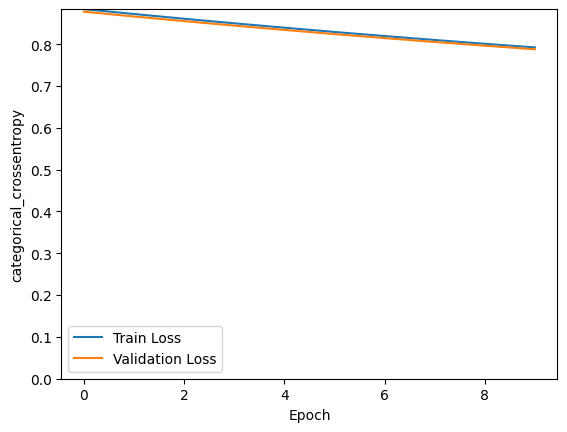

In [ ]:
learning_rate = 0.001
batch_size = 256
epochs = 10

run(learning_rate, batch_size, epochs, verbose=2)

### Ejercicio 2

Epoch 1/10
21/21 - 1s - loss: 0.5916 - val_loss: 0.5882 - 1s/epoch - 57ms/step
Epoch 2/10
21/21 - 0s - loss: 0.5832 - val_loss: 0.5807 - 85ms/epoch - 4ms/step
Epoch 3/10
21/21 - 0s - loss: 0.5768 - val_loss: 0.5751 - 98ms/epoch - 5ms/step
Epoch 4/10
21/21 - 0s - loss: 0.5720 - val_loss: 0.5710 - 79ms/epoch - 4ms/step
Epoch 5/10
21/21 - 0s - loss: 0.5685 - val_loss: 0.5679 - 89ms/epoch - 4ms/step
Epoch 6/10
21/21 - 0s - loss: 0.5659 - val_loss: 0.5656 - 82ms/epoch - 4ms/step
Epoch 7/10
21/21 - 0s - loss: 0.5640 - val_loss: 0.5639 - 85ms/epoch - 4ms/step
Epoch 8/10
21/21 - 0s - loss: 0.5626 - val_loss: 0.5625 - 99ms/epoch - 5ms/step
Epoch 9/10
21/21 - 0s - loss: 0.5615 - val_loss: 0.5615 - 80ms/epoch - 4ms/step
Epoch 10/10
21/21 - 0s - loss: 0.5606 - val_loss: 0.5607 - 81ms/epoch - 4ms/step


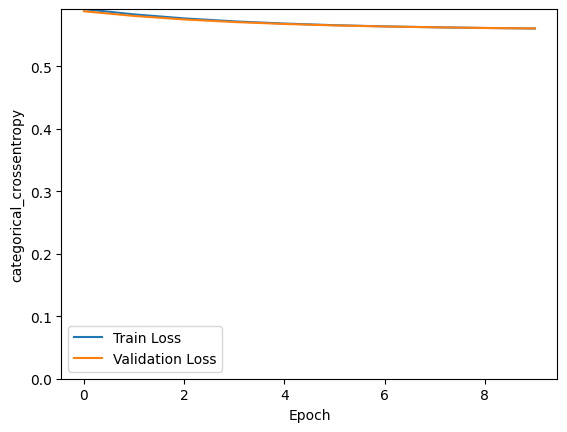

In [ ]:
learning_rate = 0.01
batch_size = 256
epochs = 10

run(learning_rate, batch_size, epochs)

### Ejercicio 3

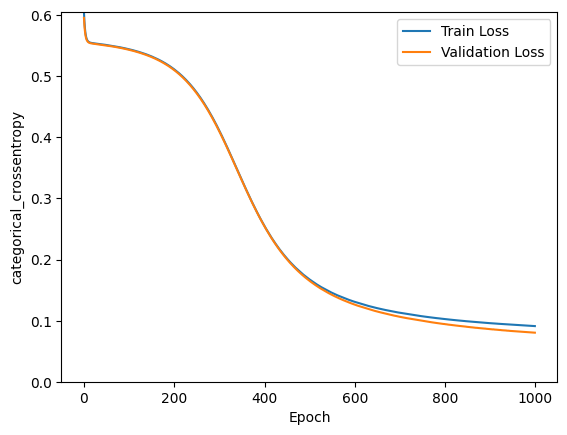

In [ ]:
learning_rate = 0.01
batch_size = 256
epochs = 1000

run(learning_rate, batch_size, epochs)

### Ejercicio 4

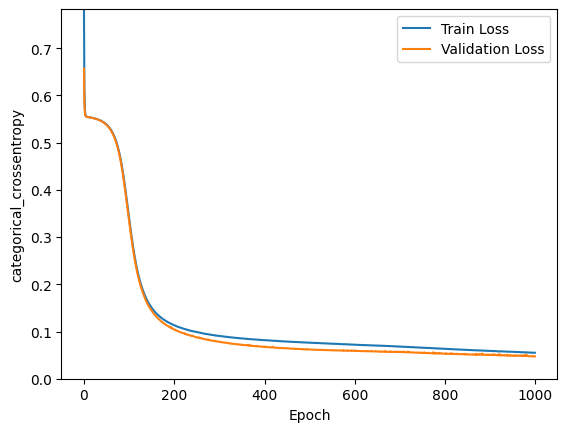

In [ ]:
learning_rate = 0.01
batch_size = 64
epochs = 1000

run(learning_rate, batch_size, epochs)

### Ejercicio 5

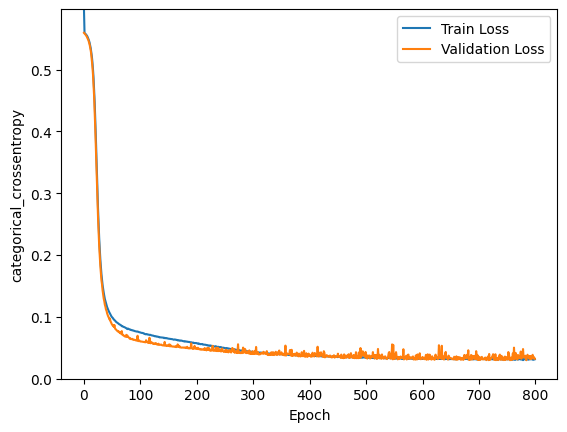

In [ ]:
learning_rate = 0.02
batch_size = 32
epochs = 800

run(learning_rate, batch_size, epochs)


# **Anexo 1:** Ayuda librerías

## Pandas

#### Importar librería

In [ ]:
import pandas

#### Crear un dataframe a partir de un fichero

In [ ]:
# Ejemplos
dataset = pandas.read_excel("path_to_filename.xlsx")
dataset = pandas.read_csv("path_to_filename.csv")
dataset = pandas.read_pickle("path_to_filename.pkl")

FileNotFoundError: ignored

#### Operaciones básicas

In [ ]:
# Obtener estadisticas básicas de todo el conjunto
dataset.describe()

In [ ]:
# Buscar columnas con valores inexistentes
dataset.isnull().any()

In [ ]:
# Mostrar las 5 primeras filas
dataset.head(5)

In [ ]:
# Nombre de columnas
dataset.columns 

In [ ]:
# Número de filas
len(dataset) 

In [ ]:
# Número de columnas
len(dataset.columns) 

In [ ]:
# Acceder a una columna
dataset["column1"] 

In [ ]:
# Operaciones sobre columnas numéricas
dataset["column1"]+1

In [ ]:
# Ver los valores únicos (sin repeticiones) de una columna
dataset["column1"].unique() 

In [ ]:
# Añadir columna
dataset["column_new"] = 1

In [ ]:
# Acceder a varias columnas
dataset[["column1","column2"]] 

In [ ]:
# Obtener el máximo, media y mínimo de una columna
max_col  = dataset["column1"].max()
mean_col = dataset["column1"].mean()
min_col  = dataset["column1"].min()

print(max_col, mean_col ,min_col)

In [ ]:
# Obtener múltiples estadisticas de una columna
dataset["age"].describe()

In [ ]:
# Acceder a la fila 21 , columna 5 (empezando en cero)
dataset.iloc[21,5]

In [ ]:
# Acceder a todas las filas , columna 5 (empezando en cero)
dataset.iloc[:,5]

In [ ]:
# Acceder a todas las filas , columnas 0, 1, 2 y 3
dataset.iloc[:,0:4]

#### **Filtrado y agrupamiento de datos**

In [ ]:
# Obtener las filas cuya columna cumpla una condición
filtered_data = dataset.loc[dataset["column1"]>40]

In [ ]:
# Media de column2 de cada column1
dataset.groupby("column1")["column2"].mean()

## Sklearn

#### Importar librería

In [ ]:
import sklearn

#### Dividir un conjunto en dos partes

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=None, stratify=None)



```
# Tiene formato de código
```

* **dataset:** Conjunto de datos.

* **test_size:** Float entre 0.0 y 1.0 que representa el porcentaje de `dataset` que formará parte del test.

* **stratify:** Si no es None, los datos se dividen de manera estratificada, para ello hay que proporcionarle los valores de las clases.

#### Dividir un conjunto en *k* partes

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
kf.get_n_splits(dataset)

* **n_splits:** Número de divisiones del conjunto de datos.

## Tensorflow y Keras

#### Importar librería

In [ ]:
import tensorflow as tf

#### Funciones auxiliares

In [ ]:
# Añadir padding a secuencias
from tensorflow.keras.utils import pad_sequences
a = [[1], [2, 3], [4, 5, 6]]
a_sequence = pad_sequences(a) # [[0,0,1], [0,2,3], [4,5,6]]

In [ ]:
# Transformar clases a vectores
from tensorflow.keras.utils import to_categorical
a = [0,1,2,2,1,0]
a_vec = to_categorical(a) # [[1,0,0], [0,1,0], [0,0,1] ...]

#### Crear un modelo secuencial

In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()

#### Añadir capas densas a un modelo existente

In [ ]:
from tensorflow.keras.layers import Dense
model.add(Dense(10, input_dim=6, activation="relu"))
model.add(Dense(6, activation="sigmoid"))
model.add(Dense(2, activation="softmax"))

#### Definir loss, optimizador y compilar modelo

In [ ]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=1e-4)
model.compile(loss="categorical_crossentropy", optimizer=sgd)

#### Obtener resumen del modelo

In [ ]:
model.summary()

#### Entrenar modelo

In [ ]:
model.fit(X, Y, epochs=10, batch_size=512, verbose=1, validation_data=(X_val, Y_val))

* **X:** Datos de entrada para el entrenamiento.
* **Y:** Datos de salida para el entrenamiento.
* **epochs:** Número de epochs.
* **batch_size:** Tamaño de los batches.
* **verbose:** Imprimir o no información durante el entrenamiento.
* **validation_data:** Datos de entrada y salida para la fase de validación.